In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
from numpy import arange
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Random Forest

In [2]:
#Load the data into a pandas data fram and add the approproate column names
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=[cancer_data.feature_names])
df['Target'] = pd.Series(data=cancer_data.target, index=df.index)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
#target dependent variable y; the class M or B and the independent cariables
X = df.iloc[:,:-1] #all columns except 'Target' column now become independent variables
y = df.iloc[:,-1] #Target Column the binary 0/1 class we wish to predict
#train test spolit 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# 1.A Number of Samples

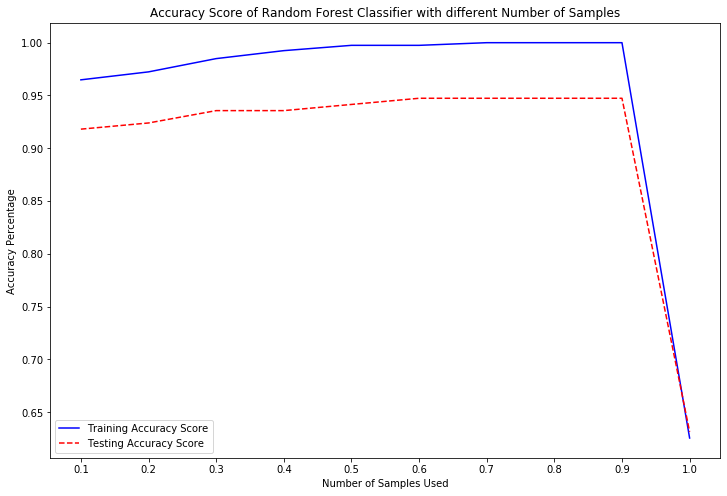

   Number_of_Samples  Accuracy
0                0.1  0.918129
1                0.2  0.923977
2                0.3  0.935673
3                0.4  0.935673
4                0.5  0.941520
5                0.6  0.947368
6                0.7  0.947368
7                0.8  0.947368
8                0.9  0.947368
9                1.0  0.631579

The Maximum Accuracy Score is 94.7368% when we test with 60.00% of our samples


In [4]:
"""In this cell we look at the Random Forest classifier on our data above where we have different number of data
observations based on a percentage scale in increments of 10% each. We will then seek to plot the accuracy of 
these various amount. First we will create some empty lists to hold values of accuracy for training and testing, 
then we will loop through the list of percentages of data to train and output an accuracy score for each using  
the metrics.accuracy_score() function and finally we print these values in a new plot """

nsamples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
nsample_training_scores = []
nsample_testing_scores = []

for j in nsamples:
    rf1 = RandomForestClassifier(random_state=1, max_samples=j)
    rf1.fit(X_train,y_train)
    y_pred_train = rf1.predict(X_train)
    y_pred_test = rf1.predict(X_test)
    nsample_training_scores.append(metrics.accuracy_score(y_train, y_pred_train))
    nsample_testing_scores.append(metrics.accuracy_score(y_test, y_pred_test))
    
plt.figure(figsize=(12,8))
plt.plot(nsamples, nsample_training_scores, '-b', label='Training Accuracy Score')
plt.plot(nsamples, nsample_testing_scores, '--r', label='Testing Accuracy Score')
plt.title('Accuracy Score of Random Forest Classifier with different Number of Samples')
plt.xticks(nsamples)
plt.ylabel('Accuracy Percentage')
plt.xlabel('Number of Samples Used')
plt.legend(loc='best')
plt.show()

array_nsamples = list(map(lambda x,y: [x,y], nsamples, nsample_testing_scores))
dfnsamples_score = pd.DataFrame(array_nsamples, columns=['Number_of_Samples','Accuracy'])
index = dfnsamples_score[['Accuracy']].idxmax()
topaccuracy = dfnsamples_score.loc[index]
a = topaccuracy['Accuracy'].max()
c = "{:.4%}".format(a)
b = topaccuracy['Number_of_Samples'].max()
d = "{:.2%}".format(b)
print(dfnsamples_score)
print('\nThe Maximum Accuracy Score is {} when we test with {} of our samples'.format(c,d))

# 1.B Number of Features

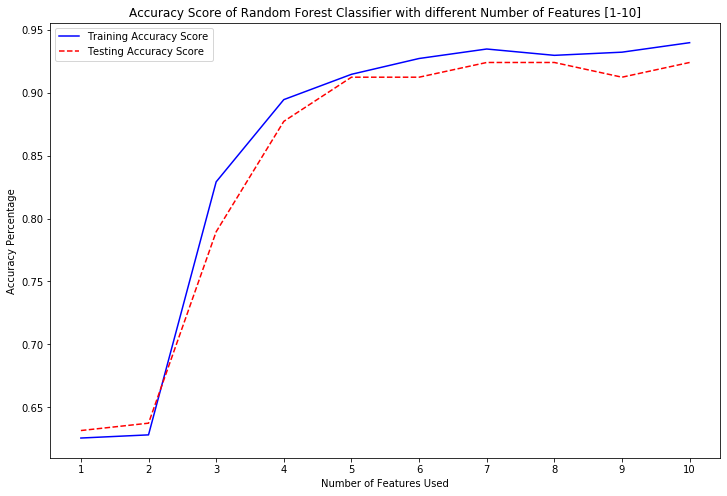

   Number_of_Features  Accuracy
0                   1  0.631579
1                   2  0.637427
2                   3  0.789474
3                   4  0.877193
4                   5  0.912281
5                   6  0.912281
6                   7  0.923977
7                   8  0.923977
8                   9  0.912281
9                  10  0.923977

The Maximum Accuracy Score is 7 when we test with 92.3977% features


In [5]:
""" In this cell we look at the Random Forest classifier on our data above where we have different number of 
features from 1 to 10. We will then seek to plot the accuracy of these various amount. First we will create 
some empty lists to hold values of accuracy for training and testing data, then we will loop through the 
list of percentages of data to train and output an accuracy score for each using the metrics.accuracy_score() 
function and finally we print these values in a new plot """

nfeatures = [1,2,3,4,5,6,7,8,9,10]
nfeatures_training_scores = []
nfeatures_testing_scores = []

for j in nfeatures:
    rf2 = RandomForestClassifier(random_state=1, max_samples=j)
    rf2.fit(X_train,y_train)
    y_pred_train = rf2.predict(X_train)
    y_pred_test = rf2.predict(X_test)
    nfeatures_training_scores.append(metrics.accuracy_score(y_train, y_pred_train))
    nfeatures_testing_scores.append(metrics.accuracy_score(y_test, y_pred_test))
    
plt.figure(figsize=(12,8))
plt.plot(nfeatures, nfeatures_training_scores, '-b', label='Training Accuracy Score')
plt.plot(nfeatures, nfeatures_testing_scores, '--r', label='Testing Accuracy Score')
plt.title('Accuracy Score of Random Forest Classifier with different Number of Features [1-10]')
plt.xticks(nfeatures)
plt.ylabel('Accuracy Percentage')
plt.xlabel('Number of Features Used')
plt.legend(loc='best')
plt.show()

array_nfeatures = list(map(lambda x,y: [x,y], nfeatures, nfeatures_testing_scores))
dfnfeatures_score = pd.DataFrame(array_nfeatures, columns=['Number_of_Features','Accuracy'])
index = dfnfeatures_score[['Accuracy']].idxmax()
topaccuracy = dfnfeatures_score.loc[index]
e = topaccuracy['Accuracy'].max()
f = "{:.4%}".format(e)
g = topaccuracy['Number_of_Features'].max()
print(dfnfeatures_score)
print('\nThe Maximum Accuracy Score is {} when we test with {} features'.format(g,f))

# 1.C Number of Trees

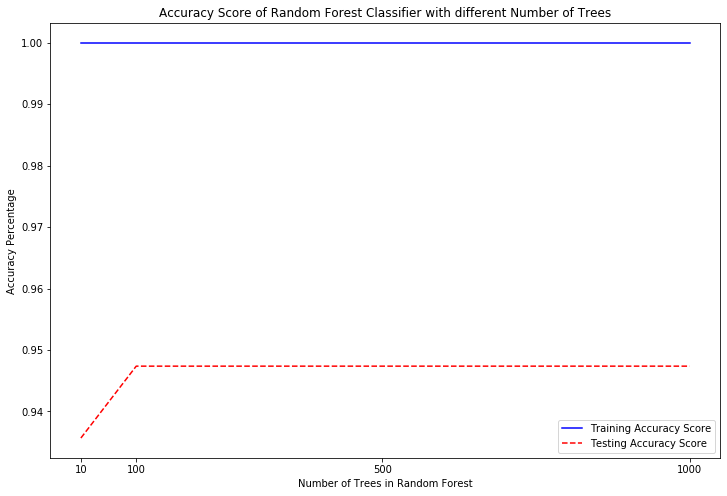

   Number_of_Features  Accuracy
0                   1  0.631579
1                   2  0.637427
2                   3  0.789474
3                   4  0.877193
4                   5  0.912281
5                   6  0.912281
6                   7  0.923977
7                   8  0.923977
8                   9  0.912281
9                  10  0.923977

The Maximum Accuracy Score is 94.7368% when we test with 100 trees


In [6]:
"""In this cell we look at the Random Forest classifier on our data above where we have different values of trees 
10, 100, 500 and 1000. We will then seek to plot the accuracy of these various amount. First we will create some
empty lists to hold values of accuracy for training and testing, then we will loop through the list of provided 
number of trees and output an accuracy score using a the metrics.accuracy_score() function and finally we print 
these values in a new plot """

ntrees = [10,100,500,1000]
ntree_training_scores = []
ntree_testing_scores = []

for i in ntrees:
    rf3 = RandomForestClassifier(n_estimators=i, random_state=1) #classifier
    rf3.fit(X_train,y_train) #fit to training data
    y_pred_train = rf3.predict(X_train) 
    y_pred_test  = rf3.predict(X_test)
    ntree_training_scores.append(metrics.accuracy_score(y_train, y_pred_train))
    ntree_testing_scores.append(metrics.accuracy_score(y_test, y_pred_test))

plt.figure(figsize=(12,8))
plt.plot(ntrees, ntree_training_scores, '-b', label='Training Accuracy Score')
plt.plot(ntrees, ntree_testing_scores, '--r', label='Testing Accuracy Score')
plt.title('Accuracy Score of Random Forest Classifier with different Number of Trees')
plt.xticks(ntrees)
plt.ylabel('Accuracy Percentage')
plt.xlabel('Number of Trees in Random Forest')
plt.legend(loc='best')
plt.show()

array_ntrees = list(map(lambda x,y: [x,y], ntrees, ntree_testing_scores))
dfntrees_score = pd.DataFrame(array_ntrees, columns=['Number_of_Trees','Accuracy'])
index = dfntrees_score[['Accuracy']].idxmax()
topaccuracy = dfntrees_score.loc[index]
h = topaccuracy['Accuracy'].max()
i = "{:.4%}".format(h)
j = topaccuracy['Number_of_Trees'].max()
print(dfnfeatures_score)
print('\nThe Maximum Accuracy Score is {} when we test with {} trees'.format(i,j))

In [7]:
print('The Maximum Accuracy Score is {} when we test with {} of our samples'.format(c,d))
print('The Maximum Accuracy Score is {} when we test with {} features'.format(f,g))
print('The Maximum Accuracy Score is {} when we test with {} trees'.format(i,j))

The Maximum Accuracy Score is 94.7368% when we test with 60.00% of our samples
The Maximum Accuracy Score is 92.3977% when we test with 7 features
The Maximum Accuracy Score is 94.7368% when we test with 100 trees


# 2. K-Nearest Neighbors. 

In [8]:
#Load the dataset and begin data cleaning process
autodf1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)
autodf1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
#Replace the '?' with NAN data
autodf1 = autodf1.replace('?', np.nan)
autodf1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
"""This code will tell us what DataType is contained in each column, since we are doing a ML algorithm, 
we want to ensure that all data we process is numeric"""
auto_df = autodf1.copy() 
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       164 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       203 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      201 non-null    object 
 19  19      201 non-null    object 
 20  20      205 non-null    float64
 21  21      203 non-null    object 
 22  22

In [11]:
autodf1 = auto_df.copy()

In [12]:
"""Notice we have quite alot of object datatypes for columns in our dataframe, first we select the index of 
these columns, then we cast it to numeric"""

obj1 = auto_df.dtypes == np.object
[i for i, x in enumerate(obj1) if x]

[1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 17, 18, 19, 21, 22, 25]

In [13]:
#Notice thiese are both actual numeric & categorical/class data, here we will change the dtype of numeric data cols
auto_df[[1, 2, 3, 4, 5, 6, 7, 8, 14, 15, 17, 18, 19, 21, 22, 25]]

,1,2,3,4,5,6,7,8,14,15,17,18,19,21,22,25
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500
3,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500,13950
4,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300,19045
202,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.40,106,4800,22470


In [14]:
#We will select the columns that are indeed really numeric listed as object and cast to numeric dtype

all_numeric = auto_df.columns.drop([2,3,4,5,6,7,8,14,15,17]) #exclude the object & categorical columns
auto_df[all_numeric] = auto_df[all_numeric].apply(pd.to_numeric)

#Now we verify the columns that were objects and numeric are now indeed numeric
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       164 non-null    float64
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       203 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      201 non-null    float64
 19  19      201 non-null    float64
 20  20      205 non-null    float64
 21  21      203 non-null    float64
 22  22

In [15]:
"""As part of our Data cleaning process, since we have null values and missing values in both numeric and 
categorical, we must now fill these values in, mode with categorical and mean for numeric"""

#Fill numeric columns with mean values
auto_df[[1,18,19,21,22,25]] = auto_df[[1,18,19,21,22,25]].fillna(value = auto_df[[1,18,19,21,22,25]].mean())

#Fill object/class columns with mode values
auto_df[5].fillna(auto_df.mode()[5][0], inplace=True)

#Now verify we don't have any missing/null values
auto_df.isna().sum().sum()

0

In [16]:
obj2 = auto_df.dtypes == np.object
obj3 = [i for i, x in enumerate(obj2) if x]
obj3

[2, 3, 4, 5, 6, 7, 8, 14, 15, 17]

In [17]:
"""To begin or Machine Learning Task with KNN we must first apply class labels to the categorical variables
in our dataframe. We can do this with the LabelEncoder() function"""

objects_df = np.array(auto_df.select_dtypes(include=['object']).columns) 
names_le = []

for i in objects_df.reshape(-1,1):
    le = preprocessing.LabelEncoder()
    auto_df[i] = auto_df[i].apply(le.fit_transform)
    names_le.append(dict(zip(le.classes_, le.transform(le.classes_))))
    
print(names_le)
print('\n Our dataframe with categorical data is now classified with numbers\n\n{}\n'.format(auto_df[[2,3,4,5,6,7,8,14,15,17]]))
print(auto_df.info())
print('\n {}'.format(auto_df))

[{'alfa-romero': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'dodge': 4, 'honda': 5, 'isuzu': 6, 'jaguar': 7, 'mazda': 8, 'mercedes-benz': 9, 'mercury': 10, 'mitsubishi': 11, 'nissan': 12, 'peugot': 13, 'plymouth': 14, 'porsche': 15, 'renault': 16, 'saab': 17, 'subaru': 18, 'toyota': 19, 'volkswagen': 20, 'volvo': 21}, {'diesel': 0, 'gas': 1}, {'std': 0, 'turbo': 1}, {'four': 0, 'two': 1}, {'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4}, {'4wd': 0, 'fwd': 1, 'rwd': 2}, {'front': 0, 'rear': 1}, {'dohc': 0, 'dohcv': 1, 'l': 2, 'ohc': 3, 'ohcf': 4, 'ohcv': 5, 'rotor': 6}, {'eight': 0, 'five': 1, 'four': 2, 'six': 3, 'three': 4, 'twelve': 5, 'two': 6}, {'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7}]

 Our dataframe with categorical data is now classified with numbers

     2   3   4   5   6   7   8   14  15  17
0     0   1   0   1   0   2   0   0   2   5
1     0   1   0   1   0   2   0   0   2   5
2     0   1   0   1   2   2   0 

In [18]:
#We will now use the given KNN() and euclidean_distance() functions

def knn(data, query, k, distance_fn):
    neighbor_distances_and_indices = []
    for index in range(len(auto_df)):
        example = auto_df.iloc[index]
        distance = distance_fn(example, query)
        neighbor_distances_and_indices.append((distance, index))
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    return k_nearest_distances_and_indices

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

In [19]:
"""We are given the following query we must pass into or knn recommender system, but we now see that it 
maintains the original categorical variables, so we must now encode these classes using our dataframe created
after applying the label encoder""" 

query = [1,100,'bmw','gas','std','four','sedan','fwd','front',100.0,170.0,65.0,50.0,2000,
         'rotor','four',200,'mfi',3.0,3.0,15,200,5000,23,27,30000]

query1 = query.copy()

for i, j in zip(objects_df, range(len(names_le))):
    encoding = names_le[j].get(query[i])
    query1[i] = encoding
    
print(query1)

[1, 100, 2, 1, 0, 0, 3, 1, 0, 100.0, 170.0, 65.0, 50.0, 2000, 6, 2, 200, 4, 3.0, 3.0, 15, 200, 5000, 23, 27, 30000]


In [20]:
#Apply our encoded query using KNN for k=5

knn_list = knn(auto_df, query1, k=5, distance_fn=euclidean_distance) #apply KNN
list1 = [i for distance, i in knn_list] 
autodf1.iloc[list1]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
69,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
126,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528


In [21]:
#Apply our encoded query using KNN for k=10

knn_list = knn(auto_df, query1, k=10, distance_fn=euclidean_distance) #apply KNN
list2 = [i for distance, i in knn_list] 
autodf1.iloc[list2]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
69,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
126,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
127,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028
71,-1,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056


# 3. Naïve-Bayes Classifier

In [22]:
color=['red','blue','green','blue','blue','blue','red','green','green','blue','blue','red']
shape=['square','circle','square','square','square','circle','square','circle','square','circle','square','square']
label=['plus','plus','plus','minus','minus','plus','plus','minus','plus','minus','plus','minus']

#Encoding process
le = preprocessing.LabelEncoder()
color_ = le.fit_transform(color)
le_color = dict(zip(le.classes_, le.transform(le.classes_)))
shape_ = le.fit_transform(shape)
le_shape = dict(zip(le.classes_, le.transform(le.classes_)))
label_ = le.fit_transform(label)
le_label = dict(zip(le.classes_, le.transform(le.classes_)))

#Combinig color and shape into single list of tuples
color_and_shape = zip(color_,shape_)
color_and_shape = list(color_and_shape)

#Model Training
model = GaussianNB()
model.fit(color_and_shape,label_)

#Testing {blue, square}
sample = ['blue','square']
print('Sample #1 = {}'.format(sample))
sample[0] = le_color.get(sample[0])
sample[1] = le_shape.get(sample[1])
print('Label Encoded Version of our Sample = {}'.format(sample))
#Predict Output after applying Naive Bayes Classifier
predicted_features = model.predict([sample])
predicted_features = list(le_label.keys())[list(le_label.values()).index(predicted_features)]
print('Applying NB Classifier to Sample #1 the Model predicts it to be a [{}]'.format(predicted_features))

"""Here we have a problem with our next Sample. We are given the color yellow which was NOT in our training set.
The result after applying the Label Encoder, will give us a None. Now we are feeding this transformed list
with a non-numeric value, we must cast to a numeric, but then this does not appear in our training set. """


#Testing {yellow, square}
sample1 = ['yellow','square']
print('\nSample #2 = {}'.format(sample1))
sample1[0] = le_color.get(sample1[0])
sample1[1] = le_shape.get(sample1[1])
print('Label Encoded Version of our Sample = {}'.format(sample1))
#Predict Output after applying Naive Bayes Classifier
sample2 = pd.to_numeric(sample1)
sample3 = np.nan_to_num(sample2)
predicted_features1 = model.predict([sample3])
predicted_features1 = list(le_label.keys())[list(le_label.values()).index(predicted_features1)]
print('Applying NB Classifier to Sample #2 the Model predicts it to be a [{}]'.format(predicted_features1))

Sample #1 = ['blue', 'square']
Label Encoded Version of our Sample = [0, 1]
Applying NB Classifier to Sample #1 the Model predicts it to be a [plus]

Sample #2 = ['yellow', 'square']
Label Encoded Version of our Sample = [None, 1]
Applying NB Classifier to Sample #2 the Model predicts it to be a [plus]


# 4. Principal Component Analysis

In [23]:
heartfail_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
heartfail_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [27]:
#Isolate response variable y, independent variables (X matrix) and train 70%, test 30%
X = heartfail_df.iloc[:,:-1]  
y = heartfail_df.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

#Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#Eigendecomposition Step: Covariance Matrix, Eigenvalues, Eigenvectors, Variance Explained etc
cov_matrix = np.cov(X_train_std.T)
evalues, evectors = np.linalg.eig(cov_matrix)
tot = sum(evalues)
variance_explained = [(i / tot) for i in sorted(evalues, reverse=True)]
sumofvarianceexplained = np.cumsum(variance_explained)

#Print all summary information in DataFrame, notice the % of Explained Variance should be in descending order
Df_evalues =  pd.DataFrame(np.column_stack([evalues,evalues/tot,sumofvarianceexplained]),
                          columns=['Eigenvalues','Percent of the Explained Variance',
                                   'Sum of Explained Variance'])
                                   
Df_evalues

,Eigenvalues,Percent of the Explained Variance,Sum of Explained Variance
0,1.781580,0.147755,0.147755
1,1.524227,0.126411,0.274166
2,1.263986,0.104828,0.378994
3,0.513444,0.042582,0.478422
4,1.198871,0.099428,0.567449
5,1.073458,0.089027,0.644222
6,0.609443,0.050544,0.717872
7,0.698315,0.057914,0.787016
8,0.746890,0.061943,0.848959
9,0.833722,0.069144,0.906874


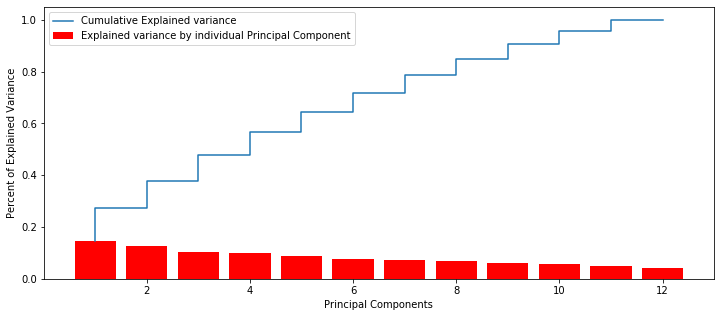

In [25]:
#Plot the variance explained by each Eigenvalue

plt.figure(figsize=(12,5))
plt.bar(range(1, len(variance_explained)+1), variance_explained, align='center',
        label='Explained variance by individual Principal Component',color='r')
plt.step(range(1, len(variance_explained)+1), sumofvarianceexplained, label='Cumulative Explained variance')
plt.ylabel('Percent of Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='upper left')
plt.show()

In [26]:
eigen_pairs = [(np.abs(evalues[i]), evectors[:, i]) for i in range(len(evalues))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

testingaccuracy_pca = []
W = eigen_pairs[0][1][:, np.newaxis] #transformation matrx

for f in [6,7,8,10]:
    for i in range(1, f):  
        W = np.hstack((W, eigen_pairs[i][1][:, np.newaxis]))
        
    X_train_pca = X_train_std.dot(W)
    X_test_pca = X_test_std.dot(W)

    lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs',max_iter=200)
    lr = lr.fit(X_train_pca, y_train)
    y_pred_test_pca = lr.predict(X_test_pca)
    testingaccuracy_pca.append(round(metrics.accuracy_score(y_test, y_pred_test_pca),2))

#Now lets look at the score of Logistic Regression when PCA is not applies    
lr2 = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs', max_iter=200)
lr2 = lr.fit(X_train, y_train)
y_pred_test = lr2.predict(X_test)
testingaccuracy = round(metrics.accuracy_score(y_test, y_pred_test),2)

print('When PCA is applied to 6,7,8,10 Principal Components we obtain an accuracy of our testing dataset of {} respectively. However, when we do not apply PCA, we have a test accuracy of {}'.format(testingaccuracy_pca,testingaccuracy))

When PCA is applied to 6,7,8,10 Principal Components we obtain an accuracy of our testing dataset of [0.79, 0.8, 0.8, 0.8] respectively. However, when we do not apply PCA, we have a test accuracy of 0.81
